In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [149]:
supply = pd.read_excel('office_supplies.xlsx')
supply

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,167014041.0,0.000000,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16169,167077817.0,0.000000,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16170,167089540.0,0.000000,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16171,167235933.0,0.000000,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,N,,NaN


In [150]:
supply.columns = [col.strip().replace('-', '_').lower() for col in supply.columns]
supply.columns = [col.strip().replace(' ', '_').lower() for col in supply.columns]

In [151]:
supply.drop_duplicates()
#same dataframe, so there were no duplicates

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,86734.0,238.704762,1.468034e+05,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,4.399842e+05,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,9.704657e+05,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,2.301936e+05,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,2.740333e+04,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,167014041.0,0.000000,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16169,167077817.0,0.000000,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16170,167089540.0,0.000000,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,N,,NaN
16171,167235933.0,0.000000,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,N,,NaN


In [152]:
supply = supply[:16172]

In [153]:
supply.isnull().sum()

customer_number                         0
campaign_period_sales                   0
historical_sales_volume                 0
date_of_first_purchase                  0
number_of_prior_year_transactions       0
do_not_direct_mail_solicit              0
do_not_email                            0
do_not_telemarket                       0
repurchase_method                       0
last_transaction_channel              442
desk                                    0
executive_chair                         1
standard_chair                          1
monitor                                 1
printer                                 1
computer                                0
insurance                               2
toner                                   2
office_supplies                         0
number_of_employees                     2
language                             4471
dtype: int64

In [154]:
supply['last_transaction_channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: last_transaction_channel, dtype: int64

In [155]:
supply['last_transaction_channel'].fillna('UNKNOWN', inplace = True)

In [156]:
supply['language'].fillna('unknown', inplace = True)

In [157]:
supply['number_of_employees'].value_counts()

6-10       5230
           3746
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: number_of_employees, dtype: int64

In [158]:
supply['number_of_employees'].fillna('unknown', inplace = True)
supply['number_of_employees'] = supply['number_of_employees'].apply(lambda x: 'unknown' if x == ' ' else x)
supply['number_of_employees'].value_counts()

6-10       5230
unknown    3748
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: number_of_employees, dtype: int64

In [159]:
supply[supply['toner'].isnull()]

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
3909,8793672.0,0.0,3.604848e+05,1990-08-15,2.0,0.0,0.0,0.0,AUTO RENEW,WEB,...,NaN,NaN,NaN,NaN,N,NaN,NaN,N,unknown,unknown
15468,52978373.0,0.0,1.135111e+06,2007-10-30,2.0,1.0,1.0,1.0,NOTICE,BILLING,...,N,N,N,N,N,NaN,NaN,N,unknown,unknown


In [160]:
supply.isnull().sum()

customer_number                      0
campaign_period_sales                0
historical_sales_volume              0
date_of_first_purchase               0
number_of_prior_year_transactions    0
do_not_direct_mail_solicit           0
do_not_email                         0
do_not_telemarket                    0
repurchase_method                    0
last_transaction_channel             0
desk                                 0
executive_chair                      1
standard_chair                       1
monitor                              1
printer                              1
computer                             0
insurance                            2
toner                                2
office_supplies                      0
number_of_employees                  0
language                             0
dtype: int64

In [161]:
supply = supply.dropna()

In [162]:
supply['repurchase_method'].value_counts()

NOTICE          11902
AUTO RENEW       4267
PAYMENT PLAN        1
Name: repurchase_method, dtype: int64

In [163]:
supply = pd.get_dummies(supply, columns=['repurchase_method'])

In [164]:
supply.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,last_transaction_channel,desk,...,printer,computer,insurance,toner,office_supplies,number_of_employees,language,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,N,...,N,N,Y,N,Y,6-10,English,1,0,0
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,MAIL,N,...,N,N,N,N,Y,11-50,English,0,1,0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,MAIL,N,...,N,N,N,N,Y,6-10,English,0,1,0
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,PHONE,N,...,N,N,N,N,Y,1-5,English,0,1,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,BRANCH (PHONE),N,...,N,N,Y,N,N,unknown,unknown,0,1,0


In [165]:
supply['last_transaction_channel_known'] = supply['last_transaction_channel'].apply(lambda x: 0 if x == 'UNKNOWN' else 1)

In [166]:
supply.drop('last_transaction_channel', inplace = True, axis=1)

In [167]:
supply.drop('customer_number', inplace=True, axis=1)

In [168]:
supply['number_of_employees'] = supply['number_of_employees'].map({'1-5': 'small', '6-10': 'small', 
                                                                   '11:50': 'small', '51-100': 'medium', 
                                                                   '101-500': 'large', '500+': 'large', 
                                                                   'unknown': 'unknown'})

In [169]:
#dummy variables for number of employees: dropping the 'unknown' dummy variable because the other three make up for it
supply = pd.get_dummies(supply, columns=['number_of_employees']).drop(['number_of_employees_unknown'], axis=1)

In [170]:
supply['language_english'] = supply['language'].apply(lambda x: 1 if x == "English" else 0)

In [171]:
supply.head()

,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,...,office_supplies,language,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english
0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,N,N,N,...,Y,English,1,0,0,1,0,0,1,1
1,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,N,N,N,...,Y,English,0,1,0,1,0,0,0,1
2,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,N,N,N,...,Y,English,0,1,0,1,0,0,1,1
3,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,N,N,N,...,Y,English,0,1,0,1,0,0,1,1
4,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,N,N,N,...,N,unknown,0,1,0,1,0,0,0,0


In [172]:
supply.describe()

,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english
count,16170.000000,1.617000e+04,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000,16170.000000
mean,245.927381,6.716669e+05,14.484663,0.107792,0.211812,0.097588,0.263884,0.736054,0.000062,0.972665,0.054236,0.085405,0.490414,0.699876
std,720.356806,9.566761e+05,8.030589,0.310127,0.408605,0.296766,0.440751,0.440784,0.007864,0.163061,0.226490,0.279492,0.499924,0.458326
min,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.900162e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,145.673810,7.874578e+05,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


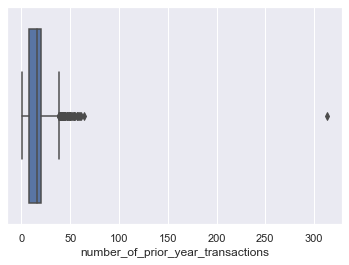

In [173]:
sns.boxplot(supply.number_of_prior_year_transactions)

In [174]:
supply = supply[supply['number_of_prior_year_transactions'] < 100]

(array([2.0000e+00, 1.1806e+04, 2.2160e+03, 7.8900e+02, 1.8500e+02,
        1.3500e+02, 1.8500e+02, 1.6200e+02, 1.4500e+02, 1.1700e+02,
        1.1100e+02, 7.4000e+01, 5.9000e+01, 4.8000e+01, 2.5000e+01,
        2.7000e+01, 2.4000e+01, 1.5000e+01, 7.0000e+00, 1.2000e+01,
        5.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-566.5       , -249.72166667,   67.05666667,  383.835     ,
         700.61333333, 1017.39166667, 1334.17      , 1650.94833333,
        1967.72666667, 2284.505     , 2601.28333333, 2918.06166667,
        3234.84      , 3551.61833333, 3868.39666667, 4185.175     ,
        4501.95333333, 4818.73166667, 5135.51      , 5452.28833333,
        5769.06666667, 6085.845     , 6402.62333333, 6719.40166667,
        7036.18      , 7352.95833333, 7669.73666667, 7986.515     ,
        8303.29333333, 8620.07166667, 8936.85      ]),
 <a list of 30 Patch objects>)

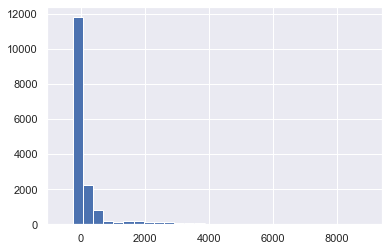

In [175]:
plt.hist(supply['campaign_period_sales'], bins = 30)

In [176]:
supply[supply.campaign_period_sales < 0]

,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,...,office_supplies,language,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english
5783,-119.333333,69223.560000,1972-04-15,5.0,1.0,1.0,1.0,N,N,N,...,N,unknown,0,1,0,1,0,0,0,0
5919,-140.960000,500408.000000,1976-10-15,25.0,0.0,1.0,0.0,N,N,N,...,Y,English,0,1,0,1,0,0,0,1
6135,-14.320000,24057.600000,1969-01-01,20.0,0.0,0.0,0.0,N,N,N,...,Y,English,0,1,0,1,0,0,1,1
10689,-421.833333,13543.210000,2006-05-15,3.0,1.0,1.0,1.0,N,N,N,...,N,unknown,0,1,0,1,0,0,0,0
11934,-161.166667,27398.333333,1993-01-15,10.0,0.0,1.0,0.0,N,N,N,...,N,unknown,0,1,0,1,0,0,0,0
15840,-566.500000,48152.670000,2014-10-31,1.0,1.0,1.0,1.0,N,N,N,...,N,unknown,0,1,0,1,0,0,0,0


In [177]:
supply['campaign_period_sales_positive'] = supply['campaign_period_sales'].apply(lambda x: 1 if x > 0 else 0)

In [178]:
now = pd.datetime.now()
supply['days_since_first_purchase'] = now - supply['date_of_first_purchase']
supply['days_since_first_purchase'] = supply['days_since_first_purchase'].dt.days
supply.drop('date_of_first_purchase', inplace=True, axis=1)

In [179]:
supply.head()

,campaign_period_sales,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,monitor,...,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_known,number_of_employees_large,number_of_employees_medium,number_of_employees_small,language_english,campaign_period_sales_positive,days_since_first_purchase
0,238.704762,146803.428571,15.0,0.0,0.0,0.0,N,N,N,N,...,1,0,0,1,0,0,1,1,1,18927
1,281.680000,439984.160000,22.0,0.0,0.0,0.0,N,N,N,N,...,0,1,0,1,0,0,0,1,1,14287
2,432.857143,970465.714286,19.0,0.0,0.0,0.0,N,N,N,N,...,0,1,0,1,0,0,1,1,1,21088
3,0.000000,230193.600000,17.0,0.0,0.0,0.0,N,N,N,N,...,0,1,0,1,0,0,1,1,0,13571
4,1370.166667,27403.333333,21.0,0.0,0.0,0.0,N,N,N,N,...,0,1,0,1,0,0,0,0,1,12066


In [180]:
supply['desk'] = supply['desk'].apply(lambda x: 0 if x == 'N' else 1)
supply['executive_chair'] = supply['executive_chair'].apply(lambda x: 0 if x == 'N' else 1)
supply['standard_chair'] = supply['standard_chair'].apply(lambda x: 0 if x == 'N' else 1)
supply['monitor'] = supply['monitor'].apply(lambda x: 0 if x == 'N' else 1)
supply['printer'] = supply['printer'].apply(lambda x: 0 if x == 'N' else 1)
supply['computer'] = supply['computer'].apply(lambda x: 0 if x == 'N' else 1)
supply['insurance'] = supply['insurance'].apply(lambda x: 0 if x == 'N' else 1)
supply['toner'] = supply['toner'].apply(lambda x: 0 if x == 'N' else 1)
supply['office_supplies'] = supply['office_supplies'].apply(lambda x: 0 if x == 'N' else 1)

In [181]:
supply['do_not_direct_mail_solicit'] = supply['do_not_direct_mail_solicit'].astype(np.int)
supply['do_not_email'] = supply['do_not_email'].astype(np.int)
supply['do_not_telemarket'] = supply['do_not_telemarket'].astype(np.int)

In [183]:
supply = supply[['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'desk', 'executive_chair', 'standard_chair', 'monitor', 'printer',
       'computer', 'insurance', 'toner', 'office_supplies', 'repurchase_method_NOTICE', 'repurchase_method_AUTO RENEW',
        'repurchase_method_PAYMENT PLAN', 
       'last_transaction_channel_known', 'number_of_employees_large',
       'number_of_employees_medium', 'number_of_employees_small',
       'language_english', 'days_since_first_purchase', 'campaign_period_sales_positive']]

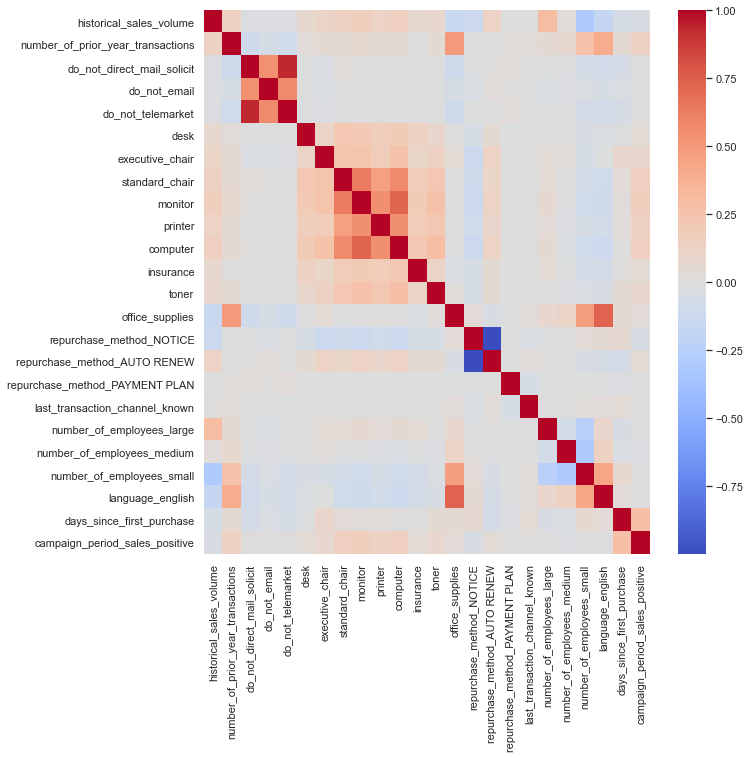

In [184]:
plt.figure(figsize=(10, 10))
sns.heatmap(supply.corr(), cmap = 'coolwarm', center = 0.0)

In [185]:
supply.drop('repurchase_method_AUTO RENEW', axis=1, inplace=True)

In [190]:
supply['prior_purchases'] = supply['desk'] + supply['executive_chair'] + supply['standard_chair'] + supply['monitor'] + supply['printer'] + supply['computer'] + supply['insurance'] + supply['toner'] + supply['office_supplies']
supply.drop(['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies'], axis=1, inplace=True)

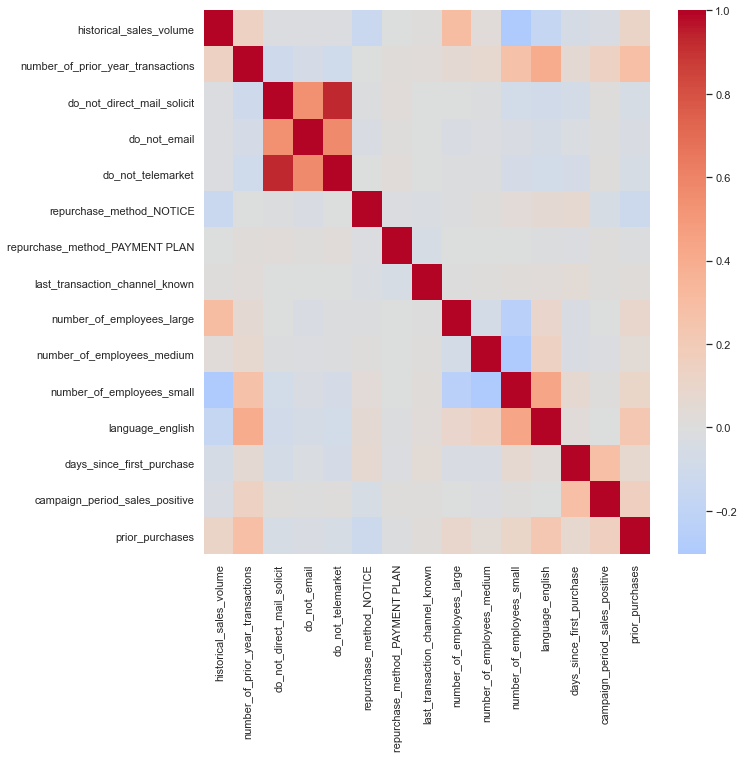

In [191]:
plt.figure(figsize=(10, 10))
sns.heatmap(supply.corr(), cmap = 'coolwarm', center = 0.0)

In [192]:
supply.drop('do_not_telemarket', axis=1, inplace=True)

In [195]:
supply = supply[['historical_sales_volume', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email',
       'repurchase_method_NOTICE', 'repurchase_method_PAYMENT PLAN',
       'last_transaction_channel_known', 'number_of_employees_large',
       'number_of_employees_medium', 'number_of_employees_small',
       'language_english', 'days_since_first_purchase', 'prior_purchases', 'campaign_period_sales_positive']]

In [197]:
from sklearn.model_selection import train_test_split

X = supply.drop(['campaign_period_sales_positive'], axis=1)
y = supply.campaign_period_sales_positive

training_features, test_features, \
training_target, test_target, = train_test_split(X, y,
                                               test_size = .2,
                                               random_state=101)

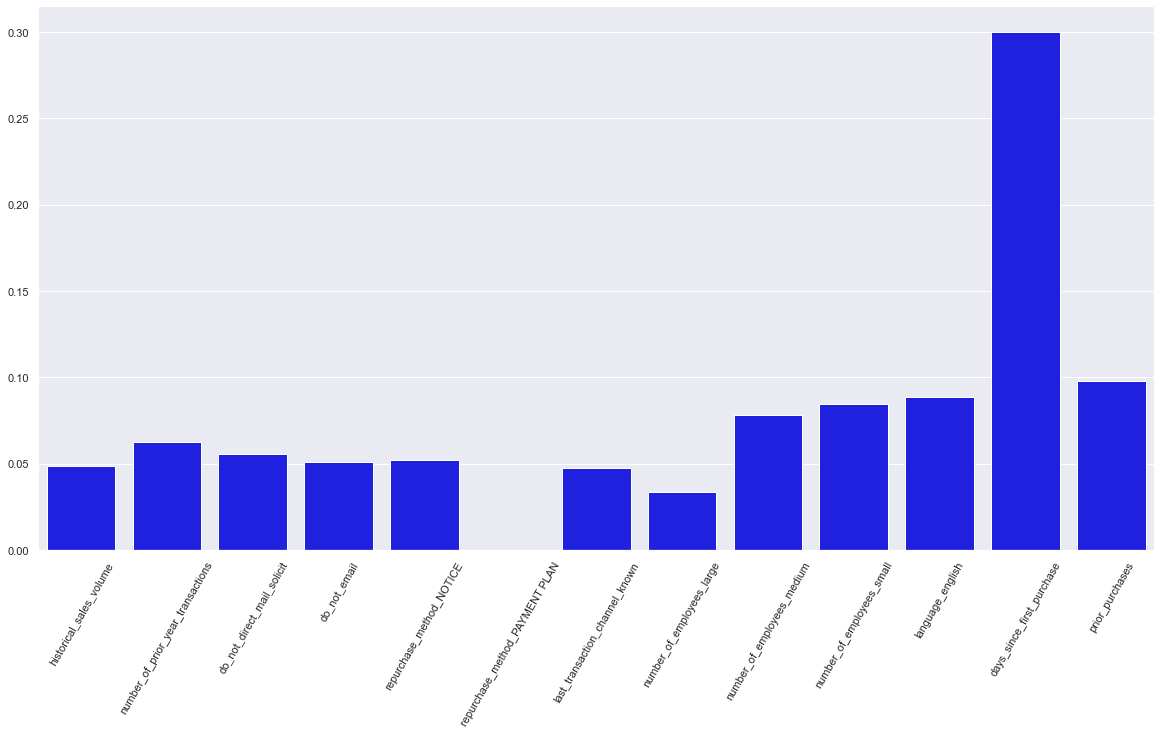

In [198]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
sns.barplot(x = training_features.columns, y = model.feature_importances_, color='blue')
plt.xticks(rotation = 60)
plt.show()

In [199]:
supply.drop('repurchase_method_PAYMENT PLAN', axis=1, inplace=True)

In [200]:
supply.to_csv('Office_Supply_V2.csv', index=False)

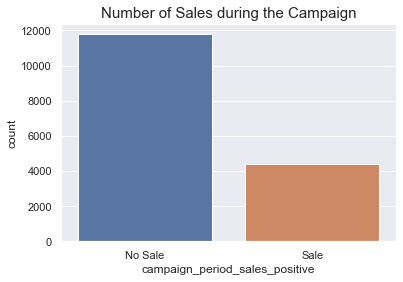

In [209]:
just_sales = supply['campaign_period_sales_positive'].apply(lambda x: 'No Sale' if x == 0 else 'Sale')
plt.title('Number of Sales during the Campaign', fontsize = 15)
sns.countplot(just_sales, order = ['No Sale', 'Sale'])